In [112]:
#Load dataset
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')

print(f"Dataset loaded: {len(df)} loan applications")
print(f"Dataset shape: {df.shape}")
print(f"\nColumns:")
print(list(df.columns))

Dataset loaded: 614 loan applications
Dataset shape: (614, 13)

Columns:
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [114]:
#Explore data

print('='*50)
print("First 10 Loan applications: ")
print('='*50)

df.head(10)

First 10 Loan applications: 


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [116]:
#Dataset info

print('='*50)
print("Dataset Info:")
print('='*50)

df.info()
print()

#Dataset statistics

print('='*50)
print("Basic Statistics:")
print('='*50)

print(df.describe())

#Target distribution

print('='*50)
print("Loan Status Distribution: ")
print('='*50)

print(df['Loan_Status'].value_counts())
print(f"\nApproval rate: {(df['Loan_Status'] == 'Y').sum() / len(df) * 100:.1f}%")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB

Basic Statistics:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
coun

In [1]:
#Visualize Data
import matplotlib.pyplot as plt

df['Loan_Status'].value_counts().plot(kind='bar', color=['Green', 'red'])
plt.title("Loan Status distribution")
plt.xlabel('Satus (N=Rejected , Y=Approved)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
plt.savefig('Loan_status_distribution.png', dpi=300, bbox_inches = 'tight')

NameError: name 'df' is not defined

Missing Values: 
Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64


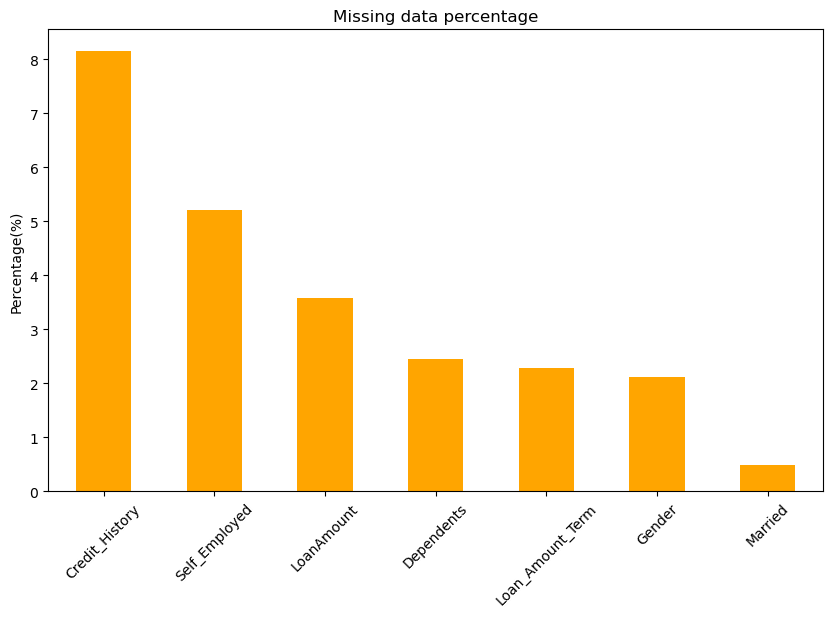

In [106]:
#Exploring Missing Values

print("Missing Values: ")
missing = df.isnull().sum()
print(missing[missing>0])

#visualize
missing_plot = ((df.isnull().sum()/len(df))*100).sort_values(ascending =False)
missing_plot = missing_plot[missing_plot>0]

if len(missing_plot)>0:
    plt.figure(figsize = (10,6))
    missing_plot.plot(kind = 'bar', color= 'orange')
    plt.title('Missing data percentage')
    plt.xticks(rotation = 45)
    plt.ylabel('Percentage(%)')
    plt.show()
else:
    print("No missing value")

In [148]:
#Data Cleaning

print('='*50)
print("Cleaning Data")
print('='*50)

numeric_cols = df.select_dtypes(include = [np.number]).columns
for col in numeric_cols:
    if df[col].isnull().sum()>0:
        df[col] = df[col].fillna(df[col].median())
        print(f"Filled {len(col)} with median")

categorical_cols = df.select_dtypes(include = ['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum()>0:
        df[col] = df[col].fillna(df[col].mode()[0])
        print(f"Filled {col} with mode" )

print(f"\nMissing Values after cleaning: {df.isnull().sum().sum()}")

Cleaning Data
Filled Gender with mode
Filled Married with mode
Filled Dependents with mode
Filled Self_Employed with mode

Missing Values after cleaning: 0


In [152]:
#Feature Engineering

print('='*50)
print("Feature Engineering")
print('='*50)

print("\nCreating new features....")

df['Total_inc'] = df['ApplicantIncome']+df['CoapplicantIncome']
print("Created Total Income")

df['Income_loan_ratio'] = df["Total_inc"]/(df['LoanAmount']+1)
print("Created Income loan ratio")

df['Loan_per_term'] = df["LoanAmount"]/(df['Loan_Amount_Term']+1)
print("Created Loan per term")

print("\nNew features created: ")
df[['Total_inc' ,'Income_loan_ratio' , 'Loan_per_term']].head()

Feature Engineering

Creating new features....
Created Total Income
Created Income loan ratio
Created Loan per term

New features created: 


,Total_inc,Income_loan_ratio,Loan_per_term
0,5849.0,45.341085,0.354571
1,6091.0,47.217054,0.354571
2,3000.0,44.776119,0.182825
3,4941.0,40.834711,0.332410
4,6000.0,42.253521,0.390582


Visualization saved as 'Loan_eda.png'


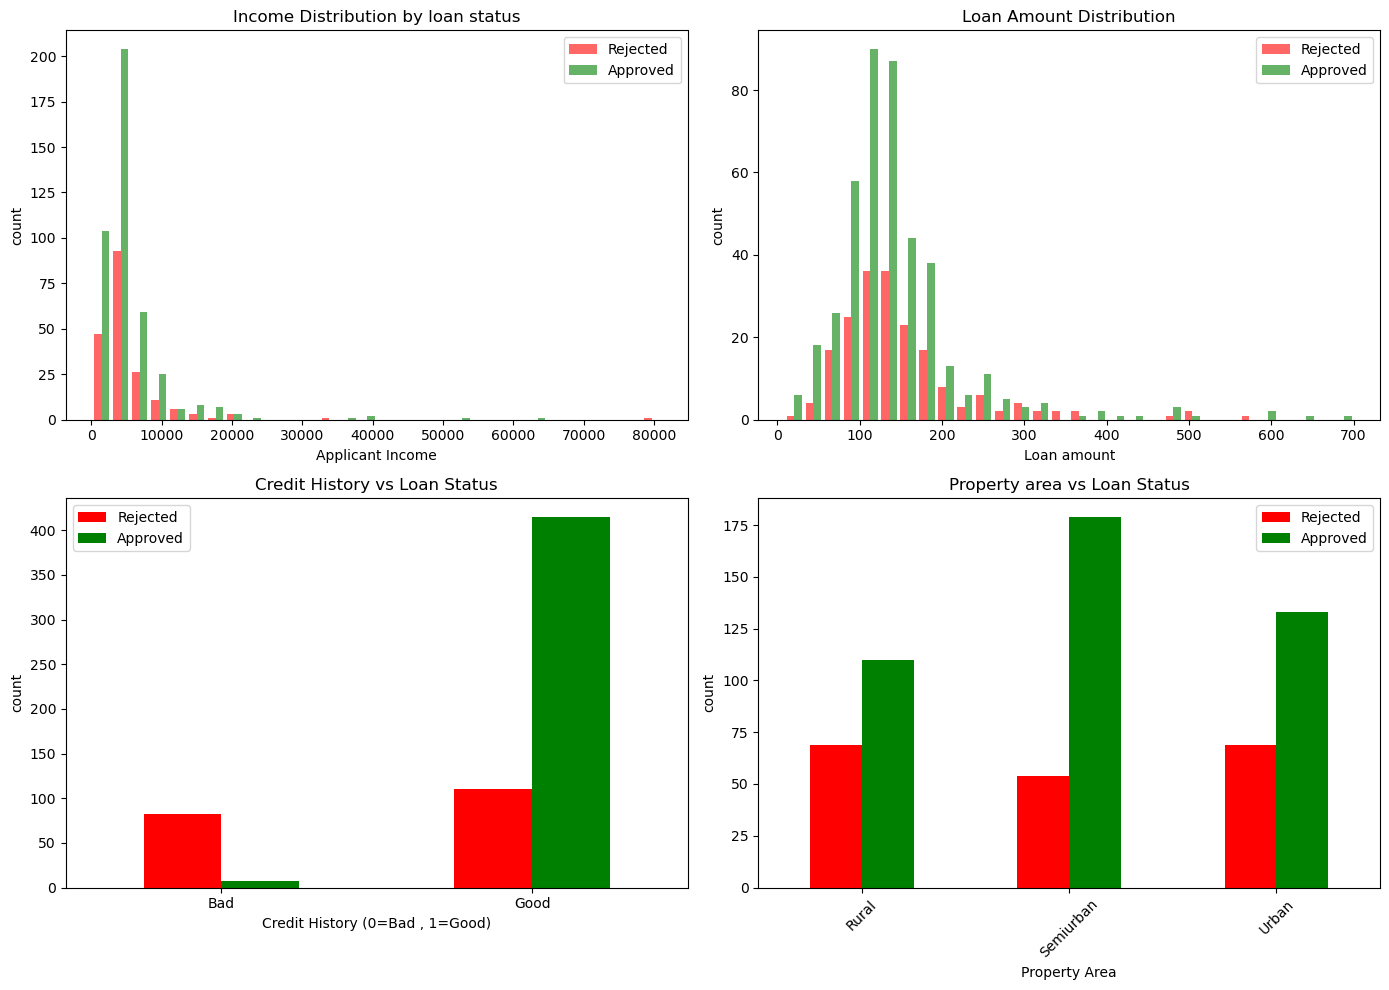

In [182]:
#Visualization of features

fig , axes = plt.subplots(2,2 , figsize = (14,10))

#income distribution
axes[0,0].hist([df[df['Loan_Status']=='N']['ApplicantIncome'],
              df[df['Loan_Status']=='Y']['ApplicantIncome']],
              label = ['Rejected' , 'Approved'] , bins = 30 , color =['red','green'] , alpha = 0.6)
axes[0,0].set_xlabel('Applicant Income')
axes[0,0].set_ylabel('count')
axes[0,0].set_title("Income Distribution by loan status")
axes[0,0].legend()

#loan amount distribution
axes[0,1].hist([df[df['Loan_Status']=='N']['LoanAmount'],
              df[df['Loan_Status']=='Y']['LoanAmount']],
              label = ['Rejected' , 'Approved'] , bins = 30 , color =['red','green'] , alpha = 0.6)
axes[0,1].set_xlabel('Loan amount')
axes[0,1].set_ylabel('count')
axes[0,1].set_title("Loan Amount Distribution")
axes[0,1].legend()

#credit history

credit_status = pd.crosstab(df['Credit_History'] , df['Loan_Status'])
credit_status.plot(kind = 'bar' , ax = axes[1,0] , color = ['red','green'])
axes[1,0].set_xlabel('Credit History (0=Bad , 1=Good)')
axes[1,0].set_ylabel('count')
axes[1,0].set_title("Credit History vs Loan Status")
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['Bad', 'Good'], rotation=0)
axes[1,0].legend(['Rejected' ,  'Approved'])

#property status

property_status = pd.crosstab(df['Property_Area'] , df['Loan_Status'])
property_status.plot(kind = 'bar' , ax = axes[1,1] , color = ['red','green'])
axes[1,1].set_xlabel('Property Area')
axes[1,1].set_ylabel('count')
axes[1,1].set_title("Property area vs Loan Status")
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)
axes[1,1].legend(['Rejected' ,  'Approved'])

plt.tight_layout()
plt.savefig('Loan_eda.png' , dpi = 300 , bbox_inches = 'tight')
print("Visualization saved as 'Loan_eda.png'")
plt.show()

In [198]:
from sklearn.preprocessing import LabelEncoder

print('='*50)
print("Encoding categorical data")
print('='*50)

df_encoded = df.copy()

binary_mapping = {
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No' : 0},
    'Education': {'Graduate': 1, 'Not Graduated' : 0},
    'Self_Employed' : {'Yes':1 , 'No':0},
    'Loan_Status' : {'Y':1 , 'N': 0}
}

for col , mapping in binary_mapping.items():
    if col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].map(mapping)
        print(f"Encoded {col}")

label_encoders = {}
for col in ['Property_Area', 'Dependents']:
    if col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le
        print(f"Encoded {col}")

print("\nALl catergorical variable encoded")
df_encoded.head()

Encoding categorical data
Encoded Gender
Encoded Married
Encoded Education
Encoded Self_Employed
Encoded Loan_Status
Encoded Property_Area
Encoded Dependents

ALl catergorical variable encoded


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_inc,Income_loan_ratio,Loan_per_term
0,LP001002,1,0,0,1.0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0,45.341085,0.354571
1,LP001003,1,1,1,1.0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,47.217054,0.354571
2,LP001005,1,1,0,1.0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0,44.776119,0.182825
3,LP001006,1,1,0,NaN,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,40.834711,0.332410
4,LP001008,1,0,0,1.0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,42.253521,0.390582


In [213]:
#preparing data 

print('='*50)
print('Preparing Data')
print('='*50)

if 'Loan_ID' in df_encoded.columns:
    df_encoded = df_encoded.drop('Loan_ID' , axis = 1)

x = df_encoded.drop('Loan_Status' , axis =1)
y = df_encoded['Loan_Status']

print(f"\nFeature shape: {x.shape}")
print(f"\nTarget shape: {y.shape}")
print(list(x.columns))

Preparing Data

Feature shape: (614, 14)

Target shape: (614,)
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_inc', 'Income_loan_ratio', 'Loan_per_term']


In [221]:
#train test split

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

print(f"Training samples: {len(x_train)}")
print(f"Testing samples : {len(x_test)}")
print(f"\nApproval rate in training set: {y_train.sum()/len(y_train)*100:.1f}%")
print(f"\nApproval rate in test set: {y_test.sum()/len(y_test)*100:.1f}%")


Training samples: 491
Testing samples : 123

Approval rate in training set: 69.7%

Approval rate in test set: 65.0%


In [261]:
#Model 1 - Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from  sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('='*50)
print('Model 1: Logistic regression')
print('='*50)

lr_pipeline= Pipeline([
    ('imputer' , SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler()),
    ('model' , LogisticRegression(max_iter = 5000))
])

lr_pipeline.fit(x_train,y_train)
y_pred_lr = lr_pipeline.predict(x_test)

accuracy_lr = accuracy_score(y_test , y_pred_lr)
print(f"\nLogistic Regression Accuracy: {accuracy_lr*100:.2f}%")
print(f"\nClassification report")
print(classification_report(y_test,y_pred_lr , target_names= ['Rejected' , 'Approved']))

Model 1: Logistic regression

Logistic Regression Accuracy: 78.05%

Classification report
              precision    recall  f1-score   support

    Rejected       0.90      0.42      0.57        43
    Approved       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



In [271]:
#Model 2 - Decision tree

from sklearn.tree import DecisionTreeClassifier

print('='*50)
print('Model 2: Decision tree')
print('='*50)

dt_pipeline= Pipeline([
    ('imputer' , SimpleImputer(strategy = 'median')),
    ('model' , DecisionTreeClassifier(max_depth = 5 , random_state = 42))
])

dt_pipeline.fit(x_train,y_train)
y_pred_dt = dt_pipeline.predict(x_test)

accuracy_dt = accuracy_score(y_test , y_pred_dt)
print(f"\nDecision tree classifier Accuracy: {accuracy_dt*100:.2f}%")
print(f"\nClassification report")
print(classification_report(y_test,y_pred_dt , target_names= ['Rejected' , 'Approved']))

Model 2: Decision tree

Decision tree classifier Accuracy: 80.49%

Classification report
              precision    recall  f1-score   support

    Rejected       0.85      0.53      0.66        43
    Approved       0.79      0.95      0.86        80

    accuracy                           0.80       123
   macro avg       0.82      0.74      0.76       123
weighted avg       0.81      0.80      0.79       123



In [275]:
#Model 3 - Random Forest

from sklearn.ensemble import RandomForestClassifier

print('='*50)
print("Model 3: Random Forest")
print('='*50)

rf_pipeline= Pipeline([
    ('imputer' , SimpleImputer(strategy = 'median')),
    ('model' , RandomForestClassifier(n_estimators = 100 , max_depth =5 , random_state = 42))
])

rf_pipeline.fit(x_train,y_train)
y_pred_rf = rf_pipeline.predict(x_test)

accuracy_rf = accuracy_score(y_test , y_pred_rf)
print(f"\nDecision tree classifier Accuracy: {accuracy_rf*100:.2f}%")
print(f"\nClassification report")
print(classification_report(y_test,y_pred_rf , target_names= ['Rejected' , 'Approved']))

Model 3: Random Forest

Decision tree classifier Accuracy: 78.86%

Classification report
              precision    recall  f1-score   support

    Rejected       0.87      0.47      0.61        43
    Approved       0.77      0.96      0.86        80

    accuracy                           0.79       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.80      0.79      0.77       123



In [296]:
#Model comparison

print('='*50)
print('Model Comparison')
print('='*50)

results = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy' : [accuracy_lr, accuracy_dt, accuracy_rf]
}).sort_values('Accuracy' , ascending = False)

print('\n', results.to_string(index = False))

best_model_name = results.iloc[0]['Model']
best_accuracy = results.iloc[0]['Accuracy']

print(f"\nThe best model is {best_model_name} with {best_accuracy*100:.2f}% accuracy")

Model Comparison

               Model  Accuracy
      Decision Tree  0.804878
      Random Forest  0.788618
Logistic Regression  0.780488

The best model is Decision Tree with 80.49% accuracy


Visualization of Models

Model comparison chart saved


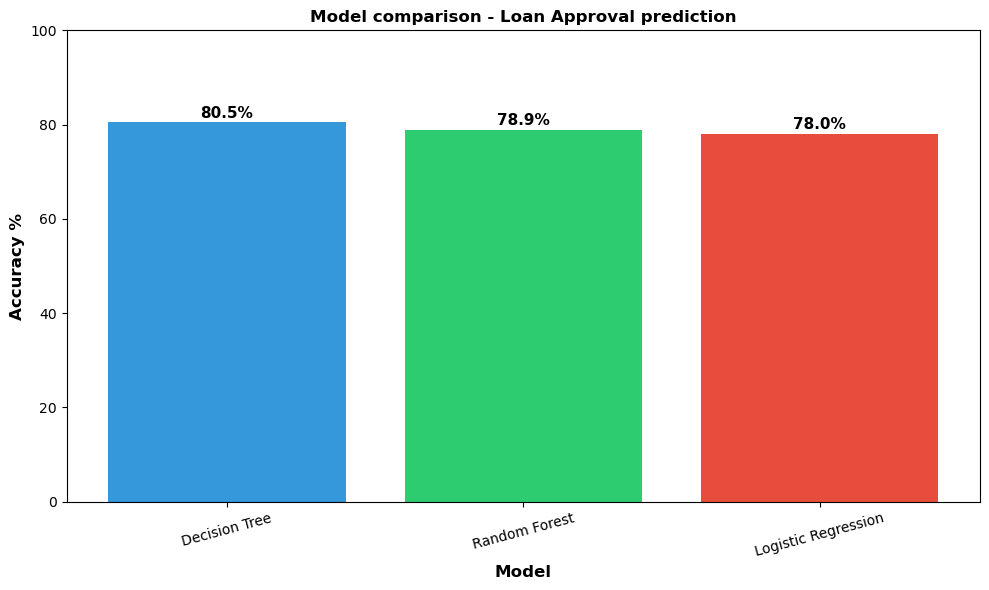

In [308]:
#Visualization

print('='*50)
print("Visualization of Models")
print('='*50)

plt.figure(figsize = (10,6))
bars = plt.bar(results['Model'], 
             results['Accuracy']*100,
             color =['#3498db', '#2ecc71', '#e74c3c'])
plt.xlabel('Model', fontsize = 12, fontweight = 'bold')
plt.ylabel('Accuracy %', fontsize =12, fontweight = 'bold')
plt.title('Model comparison - Loan Approval prediction', fontsize=12, fontweight = 'bold')
plt.ylim(0,100)

for i ,(model,acc) in enumerate(zip(results['Model'],results['Accuracy']*100)):
    plt.text(i,acc+1,f'{acc:.1f}%' , ha = 'center', fontweight = 'bold', fontsize =11)

plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
print("\nModel comparison chart saved")
plt.show()

Confusion Martrix-Random forest

Confusion Matrix: 
[[20 23]
 [ 3 77]]

True Negatives (correctly rejected): 20

False Positives (wrongly approved): 23

False Negatives (Wrongly rejected): 3

True Positives (correctly approved): 77


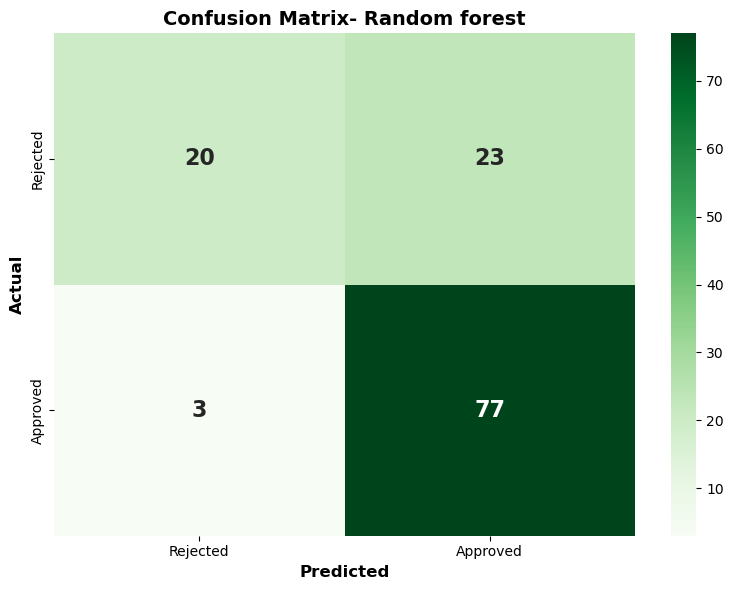


Confusion matrix of Random forest saved


<Figure size 640x480 with 0 Axes>

In [322]:
#Confusion Matrix

import seaborn as sns

print('='*50)
print('Confusion Martrix-Random forest')
print('='*50)

cm = confusion_matrix(y_test, y_pred_rf)
print('\nConfusion Matrix: ')
print(cm)
print(f"\nTrue Negatives (correctly rejected): {cm[0,0]}")
print(f"\nFalse Positives (wrongly approved): {cm[0,1]}")
print(f"\nFalse Negatives (Wrongly rejected): {cm[1,0]}")
print(f"\nTrue Positives (correctly approved): {cm[1,1]}")

plt.figure(figsize = (8,6))
sns.heatmap(cm,annot = True,  fmt = 'd', cmap = 'Greens', cbar=True,
           xticklabels = ['Rejected', 'Approved'],
           yticklabels = ['Rejected', 'Approved'],
           annot_kws = {'size':16, 'weight':'bold'})
plt.xlabel('Predicted', fontsize = 12, fontweight = 'bold')
plt.ylabel('Actual', fontsize =12, fontweight= 'bold')
plt.title('Confusion Matrix- Random forest', fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.show()
plt.savefig('loan_confusion_matrix_rf.png', dpi = 300 , bbox_inches='tight')
print('\nConfusion matrix of Random forest saved')

Confusion Martrix-best model

Confusion Matrix: 
[[23 20]
 [ 4 76]]

True Negatives (correctly rejected): 23

False Positives (wrongly approved): 20

False Negatives (Wrongly rejected): 4

True Positives (correctly approved): 76


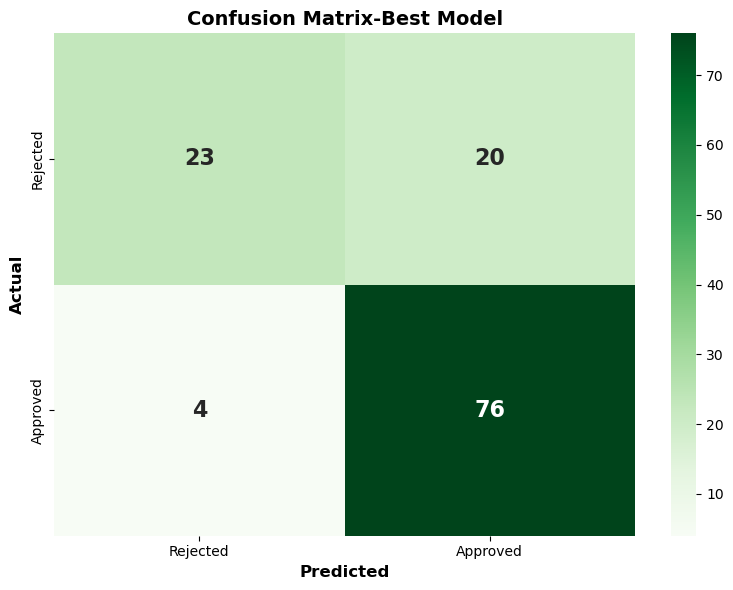


Confusion matrix of Random forest saved


<Figure size 640x480 with 0 Axes>

In [330]:
#confusion matrix of the best modal

print('='*50)
print('Confusion Martrix-best model')
print('='*50)

cm = confusion_matrix(y_test, y_pred_dt)
print('\nConfusion Matrix: ')
print(cm)
print(f"\nTrue Negatives (correctly rejected): {cm[0,0]}")
print(f"\nFalse Positives (wrongly approved): {cm[0,1]}")
print(f"\nFalse Negatives (Wrongly rejected): {cm[1,0]}")
print(f"\nTrue Positives (correctly approved): {cm[1,1]}")

plt.figure(figsize = (8,6))
sns.heatmap(cm,annot = True,  fmt = 'd', cmap = 'Greens', cbar=True,
           xticklabels = ['Rejected', 'Approved'],
           yticklabels = ['Rejected', 'Approved'],
           annot_kws = {'size':16, 'weight':'bold'})
plt.xlabel('Predicted', fontsize = 12, fontweight = 'bold')
plt.ylabel('Actual', fontsize =12, fontweight= 'bold')
plt.title('Confusion Matrix-Best Model', fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.show()
plt.savefig('loan_confusion_matrix_best.png', dpi = 300 , bbox_inches='tight')
print('\nConfusion matrix of Random forest saved')

Feature Importance

Top 5 Most important feature
              Feature  Importance
9      Credit_History    0.437598
12  Income_loan_ratio    0.112584
11          Total_inc    0.098858
13      Loan_per_term    0.068699
5     ApplicantIncome    0.062453 

Feature importance chart saved


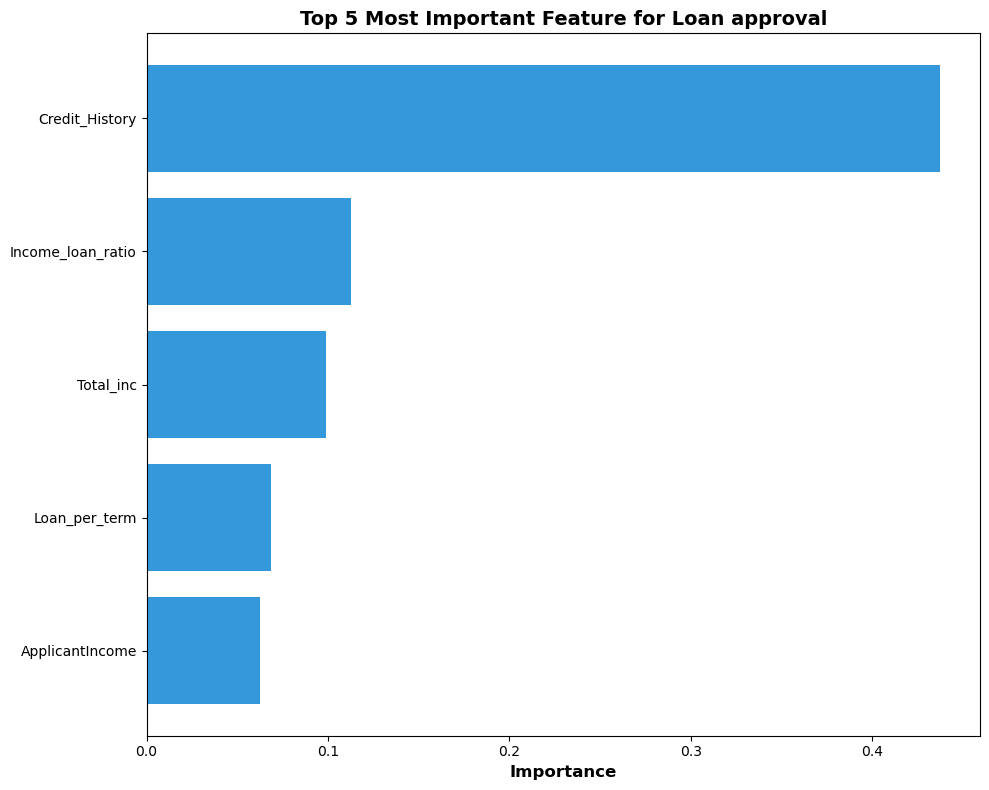

<Figure size 640x480 with 0 Axes>

In [344]:
#feature importance

print('='*50)
print("Feature Importance")
print('='*50)

#feature importance from random forest
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf_pipeline.named_steps['model'].feature_importances_
}).sort_values('Importance', ascending = False)

print('\nTop 5 Most important feature')
print(feature_importance.head(),'\n')


plt.figure(figsize = (10,8))
top_5 = feature_importance.head()
plt.barh(top_5['Feature'] ,top_5['Importance'], color='#3498db')
plt.xlabel('Importance', fontsize =12, fontweight= 'bold')
plt.title('Top 5 Most Important Feature for Loan approval', fontsize= 14, fontweight= 'bold')
plt.gca().invert_yaxis()
plt.tight_layout()
print('Feature importance chart saved')
plt.show()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')

In [360]:
#test on new data

print('='*50)
print('Testing on new loan applicants')
print('='*50)

sample_apps = pd.DataFrame({
    'Gender': [1, 0, 1],  
    'Married': [1, 0, 1],
    'Dependents': [0, 2, 1],
    'Education': [1, 1, 0],  
    'Self_Employed': [0, 0, 1],
    'ApplicantIncome': [5000, 3000, 8000],
    'CoapplicantIncome': [0, 1500, 2000],
    'LoanAmount': [150, 100, 200],
    'Loan_Amount_Term': [360, 360, 180],
    'Credit_History': [1, 0, 1],
    'Property_Area': [1, 0, 2],
    'Total_inc': [5000, 4500, 10000],
    'Income_loan_ratio': [33.33, 45, 50],
    'Loan_per_term': [0.42, 0.28, 1.11]
})

predictions = rf_pipeline.predict(sample_apps)

for i, pred in enumerate(predictions):
    status = 'Approved' if pred == 1 else 'Reject'
    print(f"Application{i+1}: {status}")
    print(f"Income: ${sample_apps.iloc[i]['ApplicantIncome']:,}")
    print(f"Loan amount: ${sample_apps.iloc[i]['LoanAmount']:,}k")
    print(f"Credit history: {'Good' if sample_apps.iloc[i]['Credit_History']==1 else 'Bad'}")
    print()


Testing on new loan applicants
Application1: Approved
Income: $5,000.0
Loan amount: $150.0k
Credit history: Good

Application2: Reject
Income: $3,000.0
Loan amount: $100.0k
Credit history: Bad

Application3: Approved
Income: $8,000.0
Loan amount: $200.0k
Credit history: Good



In [352]:
print('='*50)
print('Loan approval predictor complete!')
print('='*50)

Loan approval predictor complete!
